In [20]:
import matplotlib.pyplot as plt
import numpy as np
import csv

with open('control_prelim_data.csv', newline='') as control_csv:
    control_data = list(csv.reader(control_csv, delimiter=';'))
    
with open('carbonate_prelim_data.csv', newline='') as carbonate_csv:
    carbonate_data = list(csv.reader(carbonate_csv, delimiter=';'))

# Print out the variables and units
index = 0
for row in control_data:
    print(index,'', row[0],'', row[1])
    index += 1

meaningful_variables = 0, 3, 4, 5, 13, 14, 15
n_samples = 60
dt_samples = 10

n_stop_control = 36
n_stop_carbonate = 42 
    
# Remove headers and end values from array
for var in meaningful_variables:
    control_data[var].pop(0) # Remove header
    control_data[var].pop(0) # Remove unit
    control_data[var].pop(60) # Remover average?
    control_data[var].pop(60) # Remove empty space
    
    carbonate_data[var].pop(0) # And again.
    carbonate_data[var].pop(0)
    carbonate_data[var].pop(60)
    carbonate_data[var].pop(60) 
    
    for value in range(n_samples):
        # Convert all data into floats
        control_data[var][value] = float(control_data[var][value])
        carbonate_data[var][value] = float(carbonate_data[var][value])
                  
control_time = dt_samples * np.array(control_data[meaningful_variables[0]]) # Convert samples to time
control_O2 = control_data[meaningful_variables[1]]
control_CO = control_data[meaningful_variables[2]]
control_CO2 = control_data[meaningful_variables[3]]
control_NO = control_data[meaningful_variables[4]]
control_NOx = control_data[meaningful_variables[5]]
control_NO2 = control_data[meaningful_variables[6]]


carbonate_time = dt_samples * np.array(carbonate_data[meaningful_variables[0]]) 
carbonate_O2 = carbonate_data[meaningful_variables[1]]
carbonate_CO = carbonate_data[meaningful_variables[2]]
carbonate_CO2 = carbonate_data[meaningful_variables[3]]
carbonate_NO = carbonate_data[meaningful_variables[4]]
carbonate_NOx = carbonate_data[meaningful_variables[5]]
carbonate_NO2 = carbonate_data[meaningful_variables[6]]



0  ﻿Number  
1  Date  
2  Time  
3  O₂  %
4  CO  ppm
5  CO₂  %
6  Eff. tot HHV  %
7  Loss tot HHV  %
8  P gas  inH₂0
9  T flue  °F
10  T air  °F
11  ΔT  °F
12  Exc. air  %
13  NO  ppm
14  NOx  ppm
15  NO₂  ppm
16  CO ref.  ppm
17  NO ref.  ppm
18  NO₂ ref.  ppm
19  NOx ref.  ppm
20  Draft  inH₂0
21  Notes  


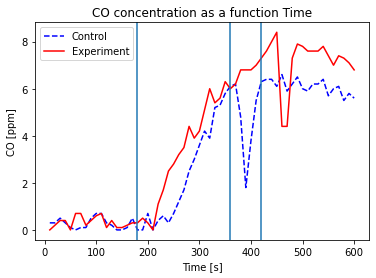

In [2]:
plt.plot(control_time,control_CO, 'b--', label='Control') 
plt.plot(carbonate_time, carbonate_CO, 'r-', label = 'Experiment')
plt.legend(loc="upper left")
plt.axvline(x=180)
plt.axvline(x=360)
plt.axvline(x=420) 
plt.ylabel('CO [ppm]')
plt.xlabel('Time [s]')
plt.title("CO concentration as a function Time")
plt.savefig('CO.png', bbox_inches='tight')

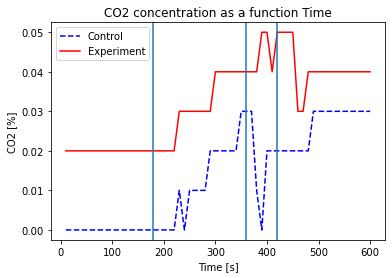

In [3]:
plt.plot(control_time,control_CO2, 'b--', label='Control') 
plt.plot(carbonate_time, carbonate_CO2, 'r-', label = 'Experiment')
plt.legend(loc="upper left")
plt.ylabel('CO2 [%]')
plt.xlabel('Time [s]')
plt.title("CO2 concentration as a function Time")
plt.axvline(x=180)
plt.axvline(x=360)
plt.axvline(x=420) 
plt.savefig('CO2.png', bbox_inches='tight')


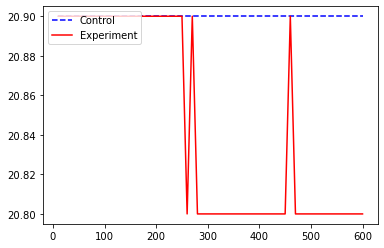

In [4]:
plt.plot(control_time,control_O2, 'b--', label='Control') 
plt.plot(carbonate_time, carbonate_O2, 'r-', label = 'Experiment')
plt.legend(loc="upper left")
plt.savefig('O2.png', bbox_inches='tight')


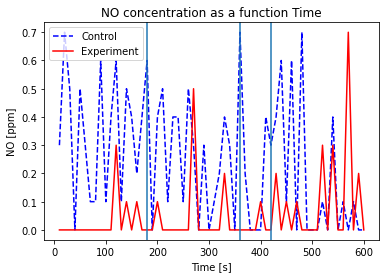

In [5]:
plt.plot(control_time,control_NO, 'b--', label='Control') 
plt.plot(carbonate_time, carbonate_NO, 'r-', label = 'Experiment')
plt.legend(loc="upper left")
plt.ylabel('NO [ppm]')
plt.xlabel('Time [s]')
plt.title("NO concentration as a function Time")
plt.axvline(x=180)
plt.axvline(x=360)
plt.axvline(x=420) 
plt.savefig('NO.png', bbox_inches='tight')


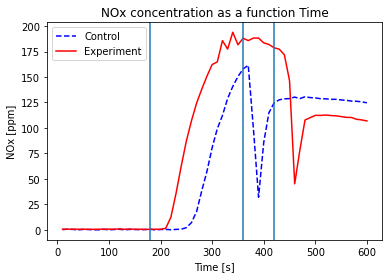

In [6]:
plt.plot(control_time,control_NOx, 'b--', label='Control') 
plt.plot(carbonate_time, carbonate_NOx, 'r-', label = 'Experiment')
plt.legend(loc="upper left")
plt.ylabel('NOx [ppm]')
plt.xlabel('Time [s]')
plt.title("NOx concentration as a function Time")
plt.axvline(x=180)
plt.axvline(x=360)
plt.axvline(x=420)
plt.savefig('NOx.png', bbox_inches='tight')

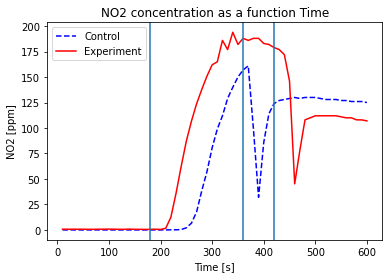

In [7]:
plt.plot(control_time,control_NO2, 'b--', label='Control') 
plt.plot(carbonate_time, carbonate_NO2, 'r-', label = 'Experiment')
plt.legend(loc="upper left")
plt.ylabel('NO2 [ppm]')
plt.xlabel('Time [s]')
plt.title("NO2 concentration as a function Time")
plt.axvline(x=180)
plt.axvline(x=360)
plt.axvline(x=420)
plt.savefig('NO2.png', bbox_inches='tight')


In [8]:
# Calculate the differential between control and experiment
time = np.zeros(n_stop_control)
dNOx = np.zeros(n_stop_control)
dCO = np.zeros(n_stop_control)
dCO2 = np.zeros(n_stop_control)
for var in meaningful_variables:
    for value in range(n_stop_control):
        time[value] = carbonate_time[value]
        dNOx[value] = carbonate_NOx[value] - control_NOx[value]
        dCO[value] = carbonate_CO[value] - control_CO[value]
        dCO2[value] = carbonate_CO2[value] - control_CO2[value]

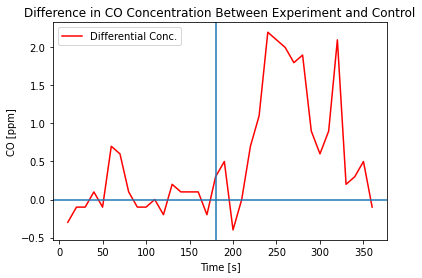

In [15]:
plt.plot(time,dCO, 'r-', label='Differential Conc.') 
plt.legend(loc="upper left")
plt.ylabel('CO [ppm]')
plt.xlabel('Time [s]')
plt.title("Difference in CO Concentration Between Experiment and Control")
plt.axvline(x=180)
plt.axhline(y=0)

plt.savefig('dCO.png', bbox_inches='tight')

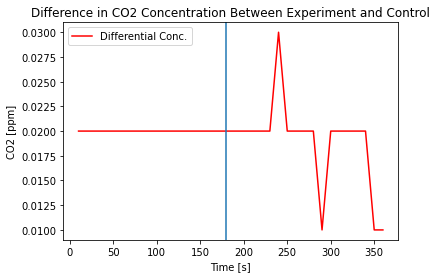

In [12]:
plt.plot(time,dCO2, 'r-', label='Differential Conc.') 
plt.legend(loc="upper left")
plt.ylabel('CO2 [ppm]')
plt.xlabel('Time [s]')
plt.title("Difference in CO2 Concentration Between Experiment and Control")
plt.axvline(x=180)
plt.savefig('dCO2.png', bbox_inches='tight')

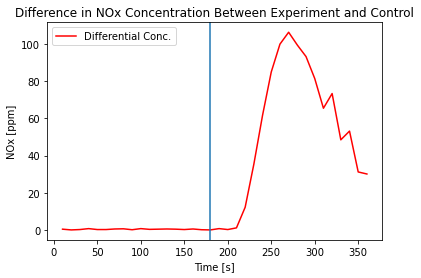

In [13]:
plt.plot(time,dNOx, 'r-', label='Differential Conc.') 
plt.legend(loc="upper left")
plt.ylabel('NOx [ppm]')
plt.xlabel('Time [s]')
plt.title("Difference in NOx Concentration Between Experiment and Control")
plt.axvline(x=180)
plt.savefig('dNOx.png', bbox_inches='tight')